<a href="https://colab.research.google.com/github/agarwalanant/EEG-Signal-Analysis/blob/master/EEG_SpeedPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, GlobalAveragePooling1D
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import np_utils, to_categorical
import numpy as np
from scipy.io import loadmat
from keras import optimizers
from keras.callbacks import *

Using TensorFlow backend.


In [0]:
#importing pre processing 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
x = loadmat('gdrive/My Drive/EEG-Signal/2.5n/0 (2).mat')
y = loadmat('gdrive/My Drive/EEG-Signal/2.5n/1 (1).mat')

In [0]:
list(x.keys()).index('S1_self_fft_T1_')

3

In [0]:
z =x[list(x)[3]]
z

In [0]:
import os
path = 'gdrive/My Drive/EEG-Signal/2.5n'
files = os.listdir(path)
files

In [0]:
import os
path = 'gdrive/My Drive/EEG-Signal_Treadmil/S7_Data/6/T1'
files = os.listdir(path)
i = 0
nn = np.empty([2400, 1],dtype=float)
for file in files:
    x = loadmat(os.path.join(path, file))
    z =x[list(x)[3]]
    z= z[:2400,:]
    nn = np.concatenate((nn, z), axis=1)
#     i=i+1
nn = nn[:,1:]    
np.save(path + '/nn', nn)    
    

In [0]:
import os
path = 'gdrive/My Drive/EEG-Signal_Treadmil/6'
files = os.listdir(path)
data60 = np.empty([0,4],dtype=float)
l =[]
for file in files:
  x = np.load(os.path.join(path, file))
  data60 = np.concatenate((data60,x), axis=0)

In [0]:
import os
path = 'gdrive/My Drive/EEG-Signal_Treadmil/3'
files = os.listdir(path)
data30 = np.empty([0,4],dtype=float)
l =[]
for file in files:
  x = np.load(os.path.join(path, file))
  data30 = np.concatenate((data30,x), axis=0)
# data30 = data30[:14400,:]

In [0]:
np.sum(data60)

29379.013615994732

In [0]:
np.sum(data30)

17176.07014177703

In [0]:
out = np.empty([data60.shape[0] + data30.shape[0],1],dtype=float)


In [0]:
out.shape

(9600, 1)

In [0]:
out[:4800,:] =0
out[4800:,:] =1

In [0]:
np.sum(out[:,:] == 1)

4800

In [0]:
out_new = to_categorical(out,num_classes= 2)

In [0]:
np.sum(out_new[:,1])

4800.0

In [0]:
out_new.shape

(9600, 2)

In [0]:
# out = out.reshape(out.shape[0],out.shape[1])

In [0]:
data = np.concatenate((data60,data30), axis=0)
data.shape
m = np.amax(data)
data= data.astype('float32')/m
pca = PCA(n_components=4)
pca.fit(data)
data = pca.transform(data)
data = np.concatenate((data,out_new), axis=1)
data.shape

(9600, 6)

In [0]:

df = pd.DataFrame(data)
for i in range(4):
  df =df[df.iloc[:,i] <0.15]
#transfer df to np
data =df.as_matrix()
# data = data.reshape(data.shape[0],-1)

#Preprocessing

# data= data.reshape(data.shape[0],4,1)
data.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(9471, 6)

In [0]:
pca = PCA()
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
np.sum(data[:,5])

4479.0

In [0]:
np.save("gdrive/My Drive/EEG-Signal_Treadmil" + '/data_train_with output_final', data)    

In [0]:
data = np.load("gdrive/My Drive/EEG-Signal_Treadmil/data_train_with output_final.npy")
data.shape

(8819, 6)

In [0]:
# #Loading Saved data
# data = np.load("gdrive/My Drive/EEG-Signal_Treadmil/data_train.npy")
# data = data.reshape(data.shape[0],-1)
# out = np.load("gdrive/My Drive/EEG-Signal_Treadmil/out_train.npy")
# print(data.shape)
# print(out.shape)
# data = np.concatenate((data,out), axis=1)
# print(data.shape)

(9600, 4)
(9600, 2)
(9600, 6)


(9600, 4)

(8819, 4)

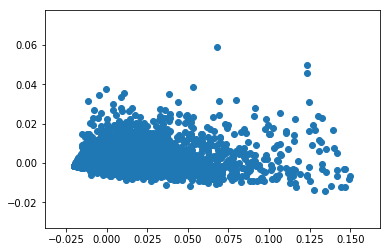

In [0]:
plt.scatter(data[:,0],data[:,3])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(8819, 4)

In [0]:
np.count_nonzero(data)

190570

In [0]:
data.shape

(8819, 6)

In [0]:
np.sum(data[:,4])

4714.0

(array([3.000e+00, 1.300e+01, 4.161e+03, 5.770e+02, 2.400e+01, 7.000e+00,
        4.000e+00, 6.000e+00, 2.000e+00, 3.000e+00]),
 array([-0.2960579 , -0.18989687, -0.08373582,  0.02242522,  0.12858626,
         0.2347473 ,  0.34090835,  0.4470694 ,  0.5532304 ,  0.65939146,
         0.7655525 ], dtype=float32),
 <a list of 10 Patch objects>)

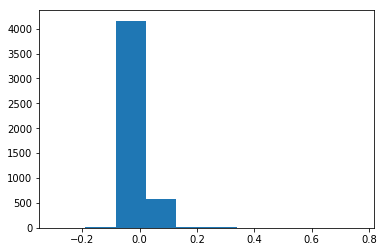

In [0]:
plt.hist(data[:4800,1])

In [0]:
data2d = data.reshape(data.shape[0],2,2,1)

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='tanh', 
                        input_shape=(2, 2, 1)))
# model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='elu',))
# model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='elu',))
# model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='tanh'))
# model.add(MaxPooling2D(pool_size=2))
# model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(8, activation='elu'))
model.add(Dense(2, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 2, 2, 16)          160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 32)          4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 32)          9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 16)          4624      
_________________________________________________________________
flatten_3 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                1056      
__________

In [0]:
inp  = data[:,:4]
inp = inp.reshape(inp.shape[0],inp.shape[1],1)
out_f = data[:,4:]
print(inp.shape)
print(out_f.shape)
print(np.sum(out_f[:,1]))

(9471, 4, 1)
(9471, 2)
4757.0


In [0]:
def modelelu():
  model = Sequential()
  model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='tanh', 
                          input_shape=(4, 1)))
  # model.add(MaxPooling2D(pool_size=2))
  model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='elu',))
  # model.add(MaxPooling2D(pool_size=2))
  model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='elu',))
  # model.add(MaxPooling2D(pool_size=2))
  model.add(Conv1D(filters=16, kernel_size=3, padding='same', activation='tanh'))
  # model.add(MaxPooling2D(pool_size=2))
  # model.add(Dropout(0.3))
  model.add(Flatten())

  model.add(Dense(32, activation='tanh'))
  model.add(Dense(32, activation='tanh'))
  model.add(Dense(8, activation='tanh'))
  model.add(Dense(2, activation='softmax'))
  return model

In [0]:
def modelrelu():
  model = Sequential()
  model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu', 
                          input_shape=(4, 1)))
  # model.add(MaxPooling2D(pool_size=2))
  model.add(Conv1D(filters=512, kernel_size=5, padding='same', activation='relu',))
  model.add(MaxPooling1D(pool_size=2))
#   model.add(Conv1D(filters=1024, kernel_size=7, padding='same', activation='relu',))
#   model.add(MaxPooling1D(pool_size=2))
#   model.add(Dropout(0.3))
#   model.add(Conv1D(filters=512, kernel_size=3, padding='same', activation='relu',))
#   # model.add(MaxPooling2D(pool_size=2))
#   model.add(Dropout(0.3))
  model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
  # model.add(MaxPooling2D(pool_size=2))
  model.add(Flatten())

  model.add(Dense(128, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(32, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  return model

In [0]:
model = modelrelu()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 4, 128)            512       
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 4, 512)            328192    
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 2, 512)            0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 2, 128)            196736    
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 128)               16512     
__________

In [0]:
model.compile(loss="binary_crossentropy", optimizer='adadelta')

In [0]:
adam = optimizers.Adam(amsgrad = True, lr =0.001)
model.compile(loss="categorical_crossentropy", optimizer=adam)

In [0]:
epochs = 100
lrate = 0.0001
decay = lrate/epochs
sgd = optimizers.SGD(lr=lrate, momentum=0.20, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [0]:
model.compile(loss='binary_crossentropy', optimizer="SGD", metrics=['accuracy'])

In [0]:
callbacks = [ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience = 1)]

In [0]:
model_history =[]
model_history.append(model.fit(inp,out_f,epochs =100,validation_split= 0.1,shuffle=False,batch_size= 16,verbose =1))

Train on 8523 samples, validate on 948 samples
Epoch 1/100
8523/8523 [==============================] - 17s 2ms/step - loss: 0.6897 - acc: 0.5512 - val_loss: 0.6940 - val_acc: 0.0000e+00
Epoch 2/100
8523/8523 [==============================] - 17s 2ms/step - loss: 0.6917 - acc: 0.5531 - val_loss: 0.7030 - val_acc: 0.0000e+00
Epoch 3/100
8523/8523 [==============================] - 17s 2ms/step - loss: 0.6900 - acc: 0.5531 - val_loss: 0.7086 - val_acc: 0.0000e+00
Epoch 4/100
8523/8523 [==============================] - 17s 2ms/step - loss: 0.6898 - acc: 0.5531 - val_loss: 0.7149 - val_acc: 0.0000e+00
Epoch 5/100
8523/8523 [==============================] - 17s 2ms/step - loss: 0.6895 - acc: 0.5531 - val_loss: 0.7210 - val_acc: 0.0000e+00
Epoch 6/100
8523/8523 [==============================] - 17s 2ms/step - loss: 0.6899 - acc: 0.5531 - val_loss: 0.7308 - val_acc: 0.0000e+00
Epoch 7/100
8523/8523 [==============================] - 17s 2ms/step - loss: 0.6886 - acc: 0.5531 - val_loss: 0.

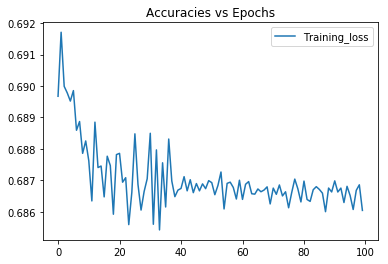

In [0]:
import matplotlib.pyplot as plt
plt.title('Accuracies vs Epochs')
# plt.plot(model_history[0].history['acc'], label='Training_Accuracy')
# plt.plot(model_history[0].history['val_acc'], label='validation Accuacy')
plt.plot(model_history[0].history['loss'], label='Training_loss')
# plt.plot(model_history[0].history['val_loss'], label='Val_loss')
plt.legend()
plt.show()

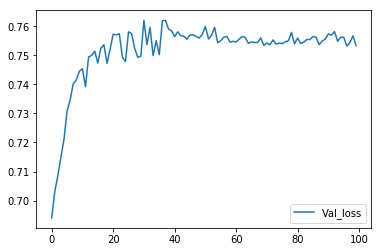

In [0]:
plt.plot(model_history[0].history['val_loss'], label='Val_loss')
plt.legend()

## **kmeans**

In [0]:
from sklearn.cluster import KMeans


In [0]:
kmeans = KMeans(n_clusters=2, n_init=10, max_iter=300, tol=0.0001, precompute_distances="auto", verbose=0, random_state=None, copy_x=True, n_jobs=None)

In [0]:
kmeans.fit(data[:,:5])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
labels = kmeans.fit_predict(data[:,:5])

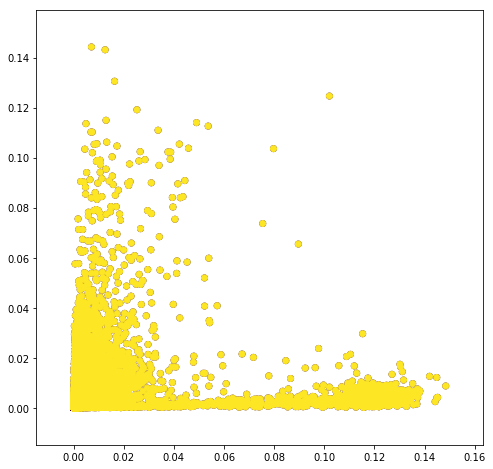

In [0]:
plt.figure(figsize=(8, 8))
plt.scatter(data[:, 0], data[:, 1], c=labels)